In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [60]:
data = pd.read_csv('IPL Matches 2008-2020.csv')
data.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba


In [61]:
data.tail(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [62]:
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (816, 17)


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [64]:
data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [65]:
data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [66]:
data['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [67]:
data['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [68]:
data['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [69]:
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

data.team1.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

data.team1.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

In [70]:
data.describe(include ='all')

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
count,8.160000e+02,803,816,812,816,816.000000,816,816,816,816,812,812,799.000000,812,19,816,816
unique,NaN,32,596,233,36,NaN,11,11,11,2,11,3,NaN,2,1,48,47
top,NaN,Mumbai,2014-05-11,AB de Villiers,Eden Gardens,NaN,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,NaN,N,D/L,HDPK Dharmasena,S Ravi
freq,NaN,101,2,23,77,NaN,108,106,106,496,120,435,NaN,799,19,78,84
mean,7.563496e+05,NaN,NaN,NaN,NaN,0.094363,NaN,NaN,NaN,NaN,NaN,NaN,17.321652,NaN,NaN,NaN,NaN
std,3.058943e+05,NaN,NaN,NaN,NaN,0.292512,NaN,NaN,NaN,NaN,NaN,NaN,22.068427,NaN,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,5.012278e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN
50%,7.292980e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN
75%,1.082626e+06,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.500000,NaN,NaN,NaN,NaN


In [71]:
data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [72]:
data['city'].fillna('Unknown', inplace=True)

In [73]:
unwanted_columns = ['date','result','eliminator','player_of_match','result_margin','id','method']
data.drop(columns=unwanted_columns, inplace=True)

In [74]:
data.dropna(subset=['winner'], inplace=True)

In [75]:
data.isnull().sum()

city             0
venue            0
neutral_venue    0
team1            0
team2            0
toss_winner      0
toss_decision    0
winner           0
umpire1          0
umpire2          0
dtype: int64

In [76]:
data.shape

(812, 10)

In [77]:
data.head()

,city,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,umpire1,umpire2
0,Bangalore,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,Asad Rauf,RE Koertzen
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,MR Benson,SL Shastri
2,Delhi,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,Aleem Dar,GA Pratapkumar
3,Mumbai,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,SJ Davis,DJ Harper
4,Kolkata,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,BF Bowden,K Hariharan


In [78]:
data.columns

Index(['city', 'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'umpire1', 'umpire2'],
      dtype='object')

In [79]:
data['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Rising Pune Supergiant', 'Kochi Tuskers Kerala', 'Gujarat Lions'],
      dtype=object)

In [80]:
team_mapping = {
    'Kolkata Knight Riders': 1,
    'Chennai Super Kings': 2,
    'Delhi Capitals': 3,
    'Royal Challengers Bangalore': 4,
    'Rajasthan Royals': 5,
    'Kings XI Punjab': 6,
    'Sunrisers Hyderabad': 7,
    'Mumbai Indians': 8,
    'Rising Pune Supergiant': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11
}

data['team1'] = data['team1'].map(team_mapping)
data['team2'] = data['team2'].map(team_mapping)

data['winner'] = data['winner'].map(team_mapping)
data['toss_winner'] = data['toss_winner'].map(team_mapping)

In [81]:
venue_mapping = {venue: i for i, venue in enumerate(data['venue'].unique())}
data['venue'] = data['venue'].map(venue_mapping)

In [82]:
data['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [83]:
temp = {'field': 0, 'bat': 1}
data['toss_decision'] = data['toss_decision'].map(temp)

In [84]:
umpires_set = set(data['umpire1'].unique()).union(set(data['umpire2'].unique()))

umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}

data['umpire1'] = data['umpire1'].map(umpire_dict)
data['umpire2'] = data['umpire2'].map(umpire_dict)

In [85]:
city_mapping = {venue: i for i, venue in enumerate(data['city'].unique())}
data['city'] = data['city'].map(city_mapping)

In [86]:
data['win']=0
data.loc[data['team1']==data['winner'], 'win'] = 1
data.drop(columns = ['winner'], inplace= True)

In [87]:
data.head()

,city,venue,neutral_venue,team1,team2,toss_winner,toss_decision,umpire1,umpire2,win
0,0,0,0,4,1,4,0,20,22,0
1,1,1,0,6,2,2,1,16,8,0
2,2,2,0,3,5,5,1,29,17,1
3,3,3,0,8,4,8,1,32,28,0
4,4,4,0,1,7,7,1,40,31,1


In [88]:
X = data.drop(['win'], axis=1)
y = data['win']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (649, 9)
y_train shape: (649,)
X_test shape: (163, 9)
y_test shape: (163,)


In [90]:
forest = RandomForestClassifier(n_estimators=500, random_state=1) 

forest.fit(X_train, y_train.values.ravel()) 

RandomForestClassifier(n_estimators=500, random_state=1)

In [91]:
importances = forest.feature_importances_

for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, data.columns[i], importances[i]))

 1) city                           0.093385
 2) venue                          0.101703
 3) neutral_venue                  0.012068
 4) team1                          0.087135
 5) team2                          0.140081
 6) toss_winner                    0.119191
 7) toss_decision                  0.036592
 8) umpire1                        0.212108
 9) umpire2                        0.197736


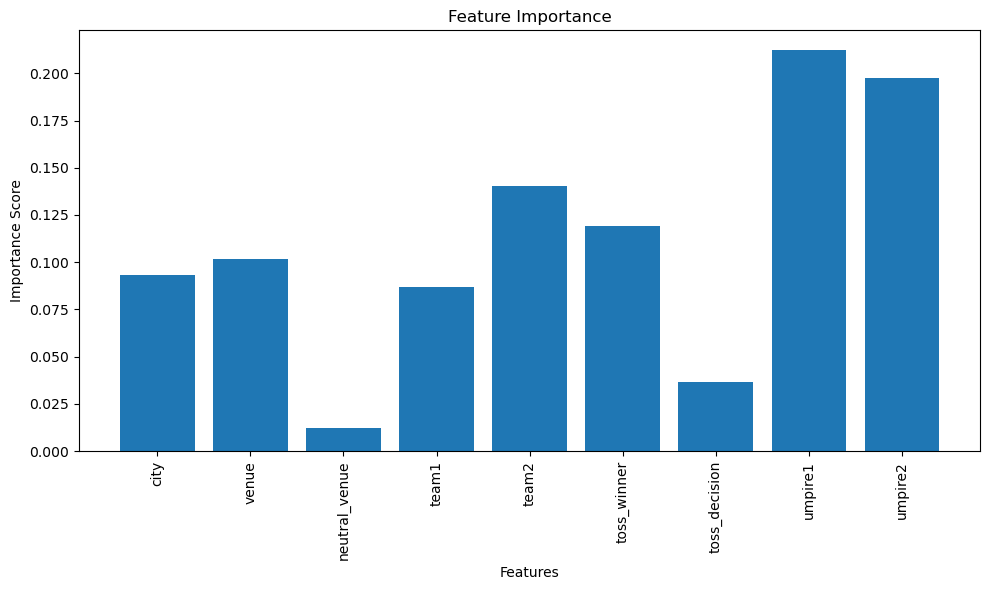

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [93]:
LR = LogisticRegression()  
LR.fit(X_train, y_train)

LogisticRegression()

In [94]:
y_predtrain = LR.predict(X_train)
y_pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_train,y_predtrain)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
dataframeLR = pd.DataFrame({'Observed Data': y_train, 'Predicted Data': y_predtrain})
print(dataframeLR.head())
print("Accuracy:", accuracy)

MSE:  0.43605546995377503
RMSE:  0.6603449628442508
     Observed Data  Predicted Data
239              0               1
446              1               1
334              0               1
293              1               1
631              0               1
Accuracy: 0.5153374233128835


In [95]:
SVCmodel = SVC()  
SVCmodel.fit(X_train, y_train)

SVC()

In [96]:
y_predtrain = SVCmodel.predict(X_train)
y_pred = SVCmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_train,y_predtrain)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
dataframeSVC = pd.DataFrame({'Observed Data': y_train, 'Predicted Data': y_predtrain})
print(dataframeSVC.head())
print("Accuracy:", accuracy)

MSE:  0.423728813559322
RMSE:  0.6509445549041193
     Observed Data  Predicted Data
239              0               1
446              1               1
334              0               1
293              1               1
631              0               1
Accuracy: 0.588957055214724


In [97]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
y_predtrain = RFC.predict(X_train)
y_pred = RFC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_train,y_predtrain)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
dataframeRFC = pd.DataFrame({'Observed Data': y_train, 'Predicted Data': y_predtrain})
print(dataframeRFC.head())
print("Accuracy:", accuracy)

MSE:  0.0
RMSE:  0.0
     Observed Data  Predicted Data
239              0               0
446              1               1
334              0               0
293              1               1
631              0               0
Accuracy: 0.50920245398773


In [114]:
DTR = DecisionTreeRegressor()  
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [112]:
y_predtrain = DTR.predict(X_train)
y_pred = DTR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_train,y_predtrain)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
dataframeDTR = pd.DataFrame({'Observed Data': y_train, 'Predicted Data': y_predtrain})
print(dataframeDTR.head())
print(y_pred)
print("Accuracy:", accuracy)

MSE:  0.0
RMSE:  0.0
     Observed Data  Predicted Data
239              0             0.0
446              1             1.0
334              0             0.0
293              1             1.0
631              0             0.0
[0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
Accuracy: 0.4723926380368098


In [101]:
import shap
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

In [102]:
# Function to get user input for prediction
def get_user_input():
    City = input("Enter the city: ")
    Venue = input("Enter the venue: ")
    Neutral_venue = int(input("Is it a neutral venue? (0 for No, 1 for Yes): "))
    Team1 = input("Enter the first team: ")
    Team2 = input("Enter the second team: ")
    Toss_winner = input("Enter the toss winner: ")
    Toss_decision = input("Enter the toss decision (bat or field): ")
    Umpire1 = input("Enter the name of the first umpire: ")
    Umpire2 = input("Enter the name of the second umpire: ")


    # Display the user input and win probability for Team 1
    print("\n\nUser Input:")
    print(f"City: {City}")
    print(f"Venue: {Venue}")
    print(f"Neutral Venue: {'Yes' if Neutral_venue == 1 else 'No'}")
    print(f"Team 1: {Team1}")
    print(f"Team 2: {Team2}")
    print(f"Toss Winner: {Toss_winner}")
    print(f"Toss Decision: {Toss_decision}")
    print(f"Umpire1: {Umpire1}")
    print(f"Umpire2: {Umpire2}")
    print("\n")

    # Map user input to numerical forms based on the mappings
    city_numeric = city_mapping.get(City, -1)
    venue_numeric = venue_mapping.get(Venue, -1)
    team1_numeric = team_mapping.get(Team1,-1)
    team2_numeric = team_mapping.get(Team2,-1)
    toss_winner_numeric = team_mapping.get(Toss_winner,-1)
    toss_decision_numeric = temp.get(Toss_decision,-1)
    umpire1_numeric = umpire_dict.get(Umpire1,-1)
    umpire2_numeric = umpire_dict.get(Umpire2,-1)

    user_data = pd.DataFrame({
        'city': [city_numeric],
        'venue': [venue_numeric],
        'neutral_venue': [Neutral_venue],
        'team1': [team1_numeric],
        'team2': [team2_numeric],
        'toss_winner': [toss_winner_numeric],
        'toss_decision': [toss_decision_numeric],
        'umpire1': [umpire1_numeric],
        'umpire2': [umpire2_numeric]
    })

    return user_data, Team1, Team2

In [103]:
def make_predictions_DTR(user_data):
    predictions = DTR.predict(user_data)

    win_probability_team1 = predictions[0]

    return win_probability_team1

In [104]:
def make_predictions_RFC(user_data):
    predictions = RFC.predict(user_data)

    win_probability_team1 = predictions[0]

    return win_probability_team1

In [105]:
def gotoshap():
    expl = shap.TreeExplainer(DTR)
    shapvalDTR = expl(X)
    print("\nBar Graph\n")
    shap.plots.bar(shapvalDTR)
    print("\nBeeswarm\n")
    shap.plots.beeswarm(shapvalDTR)
    print("\nHeatmap\n")
    shap.plots.heatmap(shapvalDTR[:1000])

In [106]:
def gotomultishap():
    expl = shap.TreeExplainer(RFC)
    shapobj = expl(X)
    shapvalRFC = expl.shap_values(X)
    shap.summary_plot(shapvalRFC, X)
    num_classes = shapobj.values.shape[2]
    
    fig, axs = plt.subplots(1, num_classes, figsize=(num_classes * 6, 15))

    for class_index in range(num_classes):
        shap_values_class = shapobj.values[:, :, class_index]
        plt.sca(axs[class_index])
        shap.summary_plot(shap_values_class, features=X, title=f'Class {class_index}', show=False, plot_size=None)

    plt.show()
    
    fig, axs = plt.subplots(1, num_classes, figsize=(num_classes * 6,6))
    
    for class_index in range(num_classes):
        plt.sca(axs[class_index])
        shap.plots.heatmap(shapobj[:,:,class_index], show=False)
        plt.title(f'Class {class_index}')
    
    plt.subplots_adjust(wspace = 1.5)
    plt.show()

Welcome to the XAI IPL Match Predictor!
Enter the city: Mumbai
Enter the venue: Wankhede Stadium
Is it a neutral venue? (0 for No, 1 for Yes): 0
Enter the first team: Mumbai Indians
Enter the second team: Royal Challengers Bangalore
Enter the toss winner: Mumbai Indians
Enter the toss decision (bat or field): bat
Enter the name of the first umpire: Aleem Dar
Enter the name of the second umpire: RB Tiffin


User Input:
City: Mumbai
Venue: Wankhede Stadium
Neutral Venue: No
Team 1: Mumbai Indians
Team 2: Royal Challengers Bangalore
Toss Winner: Mumbai Indians
Toss Decision: bat
Umpire1: Aleem Dar
Umpire2: RB Tiffin


choose a model: Decision Tree Regressor or Random Forest Classifier? (DTR/RFC)DTR

Predicted team to win: Royal Challengers Bangalore


Effects of the inputs on the final prediction:


Bar Graph



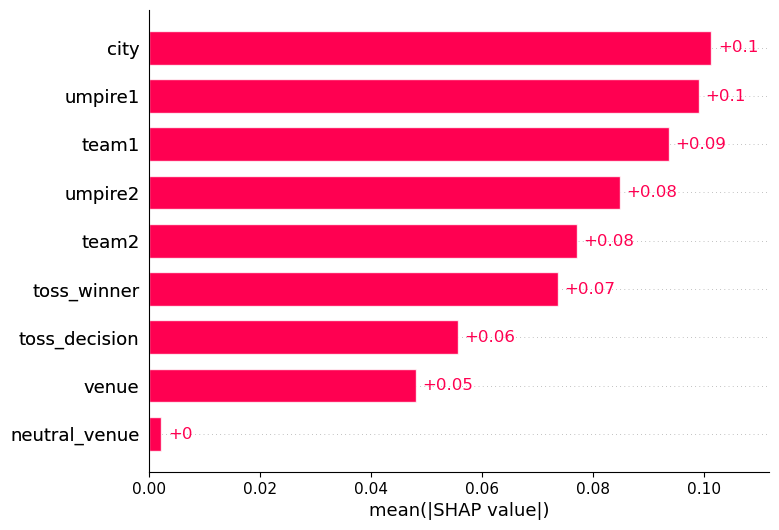


Beeswarm



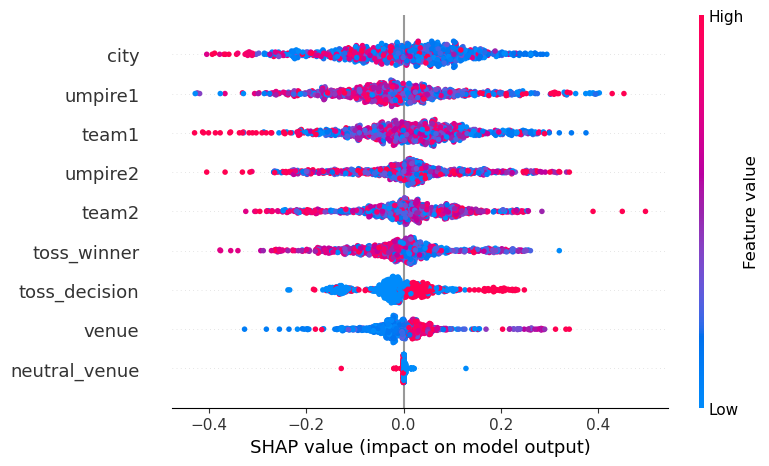


Heatmap



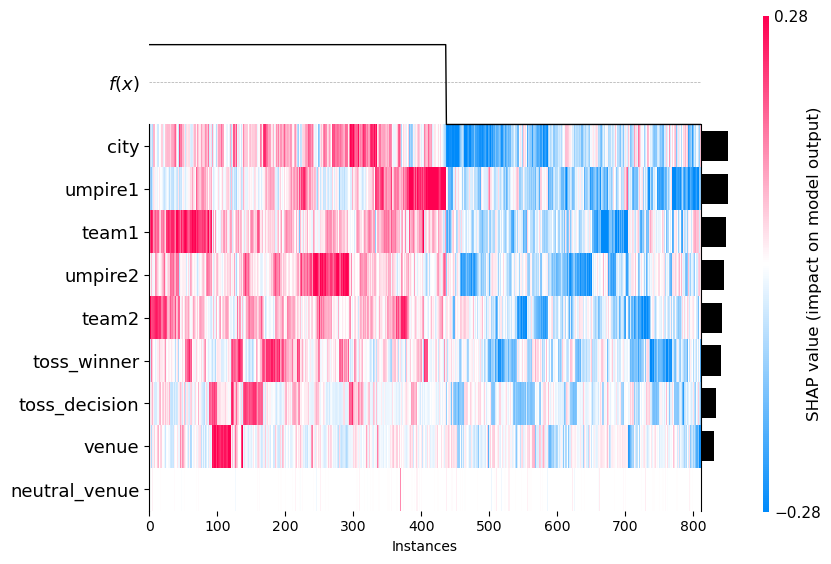




Do you want to make another prediction? (yes or no): no


Thank you for using the XAI Match Predictor!


In [107]:
def main():
    print("Welcome to the XAI IPL Match Predictor!")

    while True:
        user_data, Team1, Team2 = get_user_input()
        choice = input("choose a model: Decision Tree Regressor or Random Forest Classifier? (DTR/RFC)")
        if (choice == "DTR"):
            win_probability_team1 = make_predictions_DTR(user_data)
            win_team = ""
            if (win_probability_team1 == 0):
                win_team = Team2
            elif (win_probability_team1 == 1):
                win_team = Team1
            print("\nPredicted team to win:", win_team)
        
            print ("\n\nEffects of the inputs on the final prediction:\n")
            gotoshap()   
        
        elif (choice == "RFC"):
            win_probability_team1 = make_predictions_RFC(user_data)
            win_team = ""
            if (win_probability_team1 == 0):
                win_team = Team2
            elif (win_probability_team1 == 1):
                win_team = Team1
            print("\nPredicted team to win:", win_team)
        
            print ("\n\nEffects of the inputs on the final prediction:\n")
            gotomultishap()

        print("\n\n")
        another_prediction = input("Do you want to make another prediction? (yes or no): ")
        if another_prediction.lower() != 'yes':
            break

    print("\n\nThank you for using the XAI Match Predictor!")

if __name__ == "__main__":
    main()